### This Notebook is about studying the properties of a two-mode Squeezed vacuum state

In [1]:
using QuantumOptics
using PyPlot

In [58]:
function two_mode_char_func(state, α_list, β_list)
    # find use basis to 
    basis_a = basis(ptrace(state,1))
    basis_b = basis(ptrace(state,2))
    char_func_grid = Array{ComplexF64}(undef, length(α_list),length(β_list))

    for (i,α) in enumerate(α_list)
        for (j, β) in enumerate(β_list)
            char_func_grid[i,j] = expect(displace(basis_a,α*1im) ⊗ displace(basis_b,β), state)
        end
    end

    # plot
    ax = subplot()
    cf = ax.contourf(α_list,β_list,real(char_func_grid))
    ax.set_aspect("equal")
    ax.set_xlabel("α")
    ax.set_ylabel("β")
    ax.set_title("Two-Mode Characteristic Function")
    colorbar(cf)
    gcf()
end



function char_func_point(basis ,state, x,y)
    expect(displace(basis, x+y*1im), state)
end 

function char_func(state, xvec = [-3:0.02:3;], yvec = [-3:0.02:3;], is_real = true)
    
    fb = basis(state)
    char_func_grid = char_func_point.(Ref(fb), Ref(state), xvec', yvec)

    # plot
    ax = subplot()
    if is_real
        cf = ax.contourf(xvec,yvec,real(char_func_grid))
    else 
        cf = ax.contourf(xvec,yvec,imag(char_func_grid))
    end

    ax.set_aspect("equal")
    ax.set_xlabel("α")
    ax.set_ylabel("β")
    ax.set_title("SingleMode Characteristic Function")
    colorbar(cf)
    gcf()
end

char_func (generic function with 4 methods)

The two mode sqeuzed vacuum state is generated by $exp(\zeta^* a b - \zeta a^{\dagger} b^{\dagger}) |0,0\rangle $, with $\zeta = re^{i\phi}$ Let us visualise this state using Wigner and Characteristic Function. 

In [59]:
N = 20
fb = FockBasis(N)

a = destroy(fb)
at = create(fb)
b = destroy(fb)
bt = create(fb)

r = 1
ϕ = pi
ζ = r*exp(1im*ϕ)

tms_operator = exp(ζ*(a⊗b - at⊗bt)) # two mode squeezed operator

vac = fockstate(fb,0) ⊗ fockstate(fb,0)

tmss = tms_operator*vac;

### Plotting the Real Real two-mode char func of a TMSS

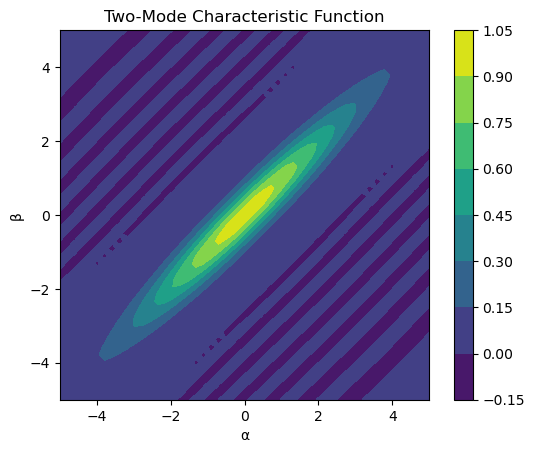

In [76]:
α = LinRange(-5,5,50)
β = LinRange(-5,5,50);
two_mode_char_func(tmss,α,β)

### plotting the char func of a traced individual cavity of a TMSS

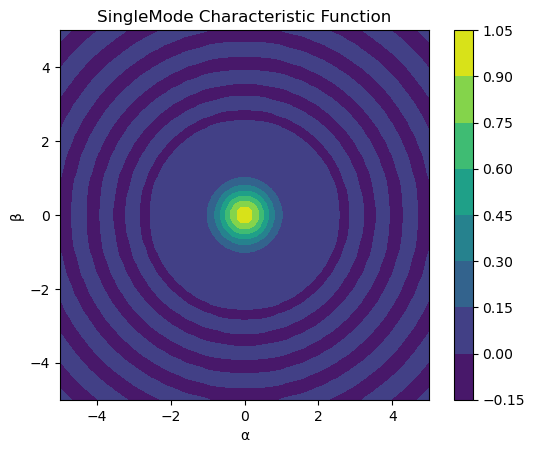

In [74]:
char_func(ptrace(tmss,1),α,α)